### importing library

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Load the dataset

In [4]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
from matplotlib import pyplot as plt
     

%matplotlib inline

In [11]:
df0= df[df.target==0]
df1= df[df.target==1]
df2= df[df.target==2]

df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


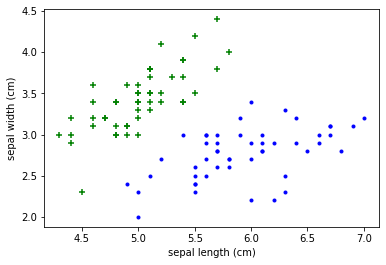

In [12]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green', marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue', marker='.')

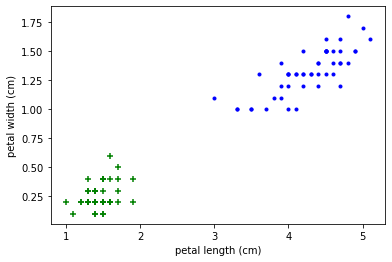

In [13]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green', marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue', marker='.')

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
     

x= df.drop(['target','flower_name'], axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y=df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [16]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [17]:
len(x_train)

120

In [18]:
len(x_test)

30

In [20]:
from sklearn.svm import SVC
model= SVC()

In [21]:
model.fit(x_train,y_train)

SVC()

In [22]:
model.score(x_test, y_test)

0.9

In [23]:
y_pred = model.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np
     

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.31622776601683794


In [25]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

In [26]:
y_val_pred = model.predict(x_test)
val_accuracy = accuracy_score(y_test, y_val_pred)

In [27]:
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.9666666666666667
Validation Accuracy: 0.9


In [28]:
hyperparameters = {'C': [0.1, 1.0, 10.0]}

In [29]:
grid_search = GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1.0, 10.0]})

In [30]:
best_model = grid_search.best_estimator_
     

cross_val_scores = cross_val_score(best_model, x_train, y_train, cv=5)

In [31]:
y_val_pred = best_model.predict(x_test)
val_accuracy = accuracy_score(y_test, y_val_pred)
     

print("Cross-Validation Scores:", cross_val_scores)
print("Validation Accuracy:", val_accuracy)

Cross-Validation Scores: [1.         0.875      1.         1.         0.95833333]
Validation Accuracy: 0.9


In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [33]:
labels = kmeans.labels_

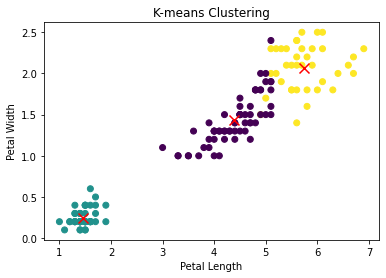

In [34]:
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=labels, cmap='viridis')  # Use column names
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker='x', color='red', s=100)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-means Clustering')
plt.show()

In [35]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5528190123564091
